## 4. 범주형(카테고리) 데이터 처리

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.csv')

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
             'acceleration','model year','origin','name']

In [ ]:
# horsepower 열의 누락 데이터 처리('?' 삭제 후 실수형으로 변경)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [ ]:
# 3개의 구간(bin)으로 나누어서 범위로 처리를 하려고 함 
count, bin_div = np.histogram(df['horsepower'], bins=3)
print(bin_div)

bin_names = ['저출력','보통출력','고출력']

In [ ]:
df['hp_bin'] = pd.cut( x = df['horsepower'], # 첫번째 인자 => 데이터 배열
                     bins = bin_div, # 두번째 인자 => 경계 리스트 
                     labels = bin_names, # bin의 이름 
                     include_lowest = True
                     )
df[['horsepower', 'hp_bin']].head()


In [ ]:
# 타이타닉을 로드하여 처리 
# 'age'컬럼으로 데이터 처리 bin을 4 로['유아기', '청소년', '청년', '장년']

import seaborn as sns
titanic = sns.load_dataset('titanic')

print(titanic['age'].dtypes) # float 64 형식


"""print(titanic.head())
count, bin_div = np.histogram(titanic['age'], bins=4)

print(bin_div)"""

In [ ]:
titanic.info()  
print(titanic['age'].isnull().sum()) # age 칼럼에는 177개의 결측치가 있음

In [ ]:
# 결측치를 평균 나이로 채움 
mean_age = titanic['age'].mean(axis=0)
titanic['age'] = titanic['age'].fillna(mean_age) 
titanic['age'] = titanic['age'].round().astype('int') # float을 int로 


In [ ]:
titanic['age'].isnull().sum(axis=0) # NaN 데이터를 처리 평균 나이로 대체
age_avg = (titanic['age'].sum() / titanic['age'].countt()).round()

titanic['age'].fillna(value= age_avg, axis=0, inplace=True)

In [ ]:
titanic.info() # 714개의 값에서 891개의 관측값으로 변경됨 

In [ ]:
bin_names = ['유아기','청소년','청년','장년']
bin_values = [0,20,40,60,100]

titanic['age_bin'] = pd.cut( x = titanic['age'],  # 데이터 배열
                       bins = bin_values,      # 경계 리스트
                       labels = bin_names,     # 빈 이름
                       include_lowest = True)

In [ ]:
titanic[['age', 'age_bin']].head(10)

In [ ]:
horse_dummies = pd.get_dummies(df['hp_bin'])
horse_dummies.head(10)
pd.get_dummies(df['hp_bin'], prefix=)

In [ ]:
from sklearn import preprocessing

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder() # label encoder 생성 
onhot_encoder = preprocessing.OneHotEncoder() # Onehot encoder 생성


In [ ]:
# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)
print(type(onehot_labeled))

# 넘파이 기초

In [ ]:
import numpy as np

In [ ]:
arr = np.arange(24)
print(arr, type(arr),":", arr.shape, arr.size, arr.dtype)

arr = arr.reshape(3,4,2)
#print(arr, type(arr),":", arr.shape, arr.size, arr.dtype)
print(arr)
arr.sum(axis=2)

In [ ]:
a_list = [1.0, 2.0, 3.0]
print(type(a_list))
arr_list = np.array(a_list)
type(arr_list)


In [ ]:
x1 = np.array([1.0, 2.0, 3.0])
y1 = np.array([5.0, 10.0, 15.0])
x2 = np.array([[1.0, 2.0],[ 3.0, 4.0]]) 
y2 = np.array([[5.0,10.0],[15.0,20.0]]) 
z1 = np.array([-1.0, -2.0])
z2 = np.array([[5.0],[10.0],[15.0]])

# ndarray basic operation  
print(x1 + y1) 
print(x1 - y1) 
print(x1 * y1) 
print(x1 / y1) 
print(x2 + y2) 
print(x2 * y2)
# ndarray broadcast 
print(x2 + z1) 
print(x2 * z1) 
print(x1 + z2) 
print(x1**2) 
print(x1>=2)

# shape manipulation
print(x2.flatten()) 
print(x2.reshape(2,2))

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# 이 배열에서 3의배수를 찾아라 
for i in x :
    if i % 3 == 0 :
        print(i)
# 이 배열에서 4로 나누면 1이 남는 수를 찾아라.
print("--------------------------------")
for i in x :
    if i % 4 == 1 :
        print(i)
# 이 배열에서 3으로 나누면나누어지고 4로 나누면 1이 남는수를 찾아라.
print("--------------------------------")
for i in x :
    if (i % 3 == 0) and (i % 4 == 1) :
        print(i)

In [ ]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.columns

In [ ]:
df = titanic.loc[ : ,['age','fare']]
df['ten'] = 10
df.head()

# 매핑 함수를 이용하여 각 원소에 동일한 함수 실행 
def add_10(n) : 
    return n + 10

add_10(20)

In [ ]:
# apply() 매서드를 활용하여 시리즈의 각 원소에 동일한 함수 실행
ar = df['age'].apply(add_10)

In [ ]:
df['ten_10'] = df['age'].apply(add_10) 
# aplly매소드는 add_10의 매개변수로 'age'칼럼의 데이터를 차례로 받아옴
df.head()

In [ ]:
df_map = df.applymap(add_10) # applymap 은 데이터프레임 모든 데이터를 함수의 매개변수로 사용
df_map.head()

In [ ]:
df['age_lamb'] = df['age'].apply(lambda x: add_10(x))
df.head()

In [ ]:
# titanic 데이터를 load
# age와 fare 컬럼만추출 
# age에서 평균 나이를 차감한 나이를 'age_avg' 컬럼으로 추가 integer타입으로
# 나이의 구간을 4단계로 나누어서( 0~20 청소년 21~70 장년 71~ 노년)으로 컬럼 추가 
# one_hot_encoding

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','fare']]
null_cnt = df['age'].isnull().sum() # age의 결측치 갯수

if null_cnt :
    df['age'].fillna(value=0, axis=0, inplace=True)

def age_minus(age, avg_age) :
    return age - avg_age
avg_age = np.array(df['age']).mean().round()

df['age_m'] = df['age'].apply(age_minus, avg_age=avg_age) # 나이의 차를 구함




bin_labels = ['청소년', '장년', '노년']
bin_values = [0, 21, 71, 100]
df['age_bin'] = pd.cut( x = df['age'],
                      bins = bin_values,
                      labels = bin_labels,
                      include_lowest = True)

df[bin_labels] = pd.get_dummies(df['age_bin'])
df[['age', 'age_m']] = df[['age', 'age_m']].astype('int')

df.head(10)

,age,fare,age_m,age_bin,청소년,장년,노년
0,22,7.2500,-2,장년,0,1,0
1,38,71.2833,14,장년,0,1,0
2,26,7.9250,2,장년,0,1,0
3,35,53.1000,11,장년,0,1,0
4,35,8.0500,11,장년,0,1,0
5,0,8.4583,-24,청소년,1,0,0
6,54,51.8625,30,장년,0,1,0
7,2,21.0750,-22,청소년,1,0,0
8,27,11.1333,3,장년,0,1,0
9,14,30.0708,-10,청소년,1,0,0


In [13]:
u_age, cnt = np.unique(df['age_bin'],return_counts=True)
print("u_age : {}, cnt : {}".format(u_age, cnt))

u_age : ['노년' '장년' '청소년'], cnt : [  2 508 381]


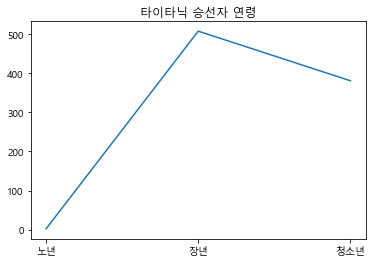

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title("타이타닉 승선자 연령")
plt.plot(u_age, cnt)
plt.show()